A demo playground that demonstrates how augmentations will transform the input image is available at
https://albumentations-demo.herokuapp.com.

In [1]:
# regular imports
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

import albumentations as A
from albumentations.pytorch import ToTensorV2

# internal
from src.dataset import MNISTDataModule

In [2]:
def visualize(image, ax):
    ax.axis('off')
    ax.imshow(image, cmap='gray')

In [3]:
aug_kwargs = dict(border_mode=A.cv2.BORDER_CONSTANT, value=0,
                  interpolation=A.cv2.INTER_LANCZOS4)

transforms = A.Compose([
    #A.RandomCrop(width=24, height=24),
    #A.HorizontalFlip(p=0.5),
    #A.GridDistortion(p=0.5, distort_limit=.3, **aug_kwargs),
    A.ElasticTransform(p=0.5, sigma=1, alpha=3, alpha_affine=0, **aug_kwargs),
    A.ElasticTransform(p=0.5, sigma=1, alpha=1, alpha_affine=3, **aug_kwargs),
    A.ShiftScaleRotate(p=1.0, scale_limit=.2, rotate_limit=0, **aug_kwargs),
    A.ShiftScaleRotate(p=1.0, scale_limit=0, rotate_limit=25, **aug_kwargs),
    #A.CoarseDropout(p=1.0, max_holes=8, max_height=4, max_width=4,
    #                min_holes=1, min_height=4, min_width=4),
    #A.RandomBrightnessContrast(p=0.2),
    #A.Blur(blur_limit=4),
    A.Normalize(mean=(0.0,), std=(1,)),#, max_pixel_value=255),
    ToTensorV2()
])

mnist = MNISTDataModule('../data/', batch_size=64,
                        train_transforms=transforms)

x, y = next(iter(mnist.train_dataloader()))
x = x.squeeze()

In [15]:
from torch.nn import functional as F
F.cosine_similarity()

TypeError: cosine_similarity() missing 2 required positional argument: "x1", "x2"

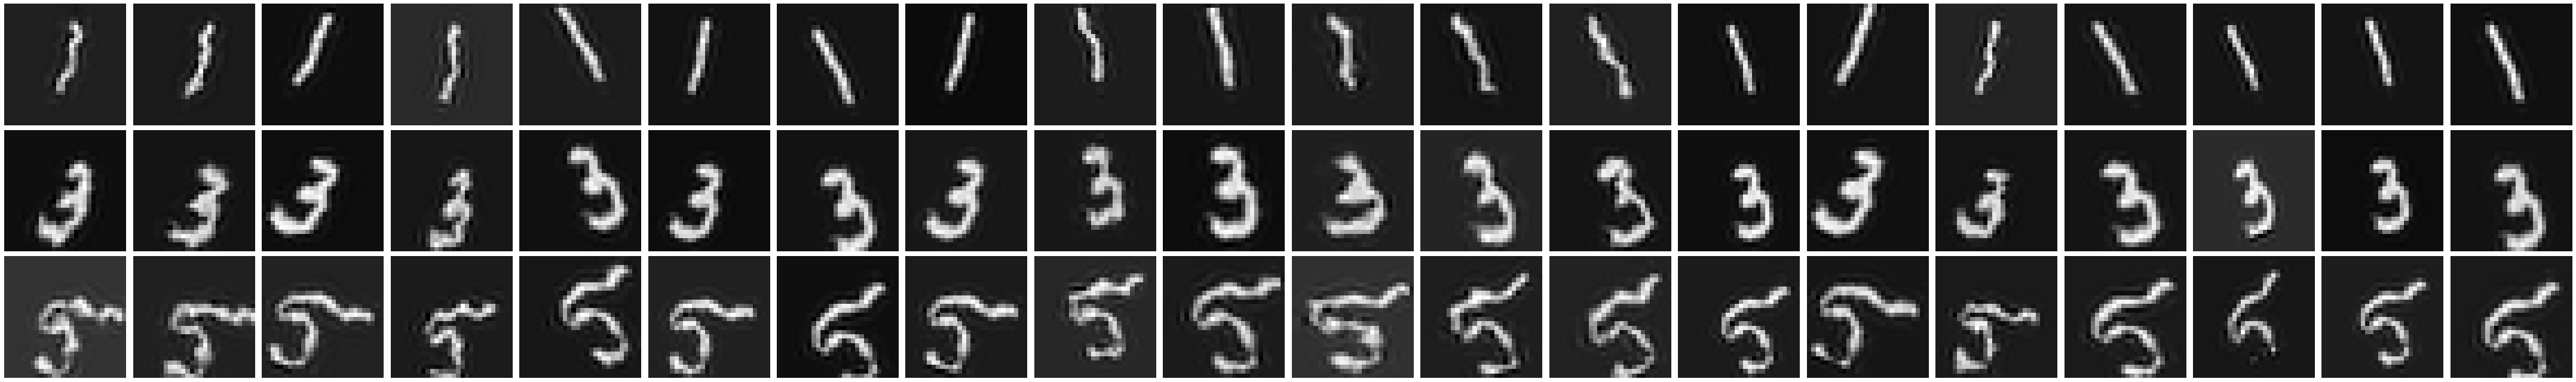

In [4]:
N, T = 3, 20
x_t = [transforms(image=x.permute(1,2,0).numpy())['image'] for _ in range(T)]
_, ax = plt.subplots(N, T, figsize=(T*3, N*3), tight_layout=True, squeeze=False)
[visualize(x_t[j][i], ax[i, j]) for i in range(N) for j in range(T)];